In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
 # pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
train_df = pd.read_csv('Resources/2019loans.csv')
test_df = pd.read_csv('Resources/2020Q1loans.csv')

In [4]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [6]:
train_df.drop(['Unnamed: 0', 'index', ], axis=1, inplace=True)
test_df.drop(['Unnamed: 0', 'index', ], axis=1, inplace=True)

In [7]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   12180 non-null  float64
 1   int_rate                    12180 non-null  float64
 2   installment                 12180 non-null  float64
 3   home_ownership              12180 non-null  object 
 4   annual_inc                  12180 non-null  float64
 5   verification_status         12180 non-null  object 
 6   loan_status                 12180 non-null  object 
 7   pymnt_plan                  12180 non-null  object 
 8   dti                         12180 non-null  float64
 9   delinq_2yrs                 12180 non-null  float64
 10  inq_last_6mths              12180 non-null  float64
 11  open_acc                    12180 non-null  float64
 12  pub_rec                     12180 non-null  float64
 13  revol_bal                   121

In [9]:
train_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.0,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.0,1.218000e+04,12180.000000,12180.000000,1.218000e+04
mean,17399.579228,0.140899,509.150241,8.989320e+04,22.589516,0.256979,0.566502,12.680296,0.11601,17593.681773,24.398522,13431.612526,13430.333733,6382.471844,6381.744212,3967.966703,2412.603877,1.901265,0.0,0.0,438.597455,0.020115,1.0,0.000082,185.009031,1.555372e+05,1.051970,3.349261,0.874713,1.977750,14.005008,44328.780542,70.460099,1.353448,2.788424,6101.435304,57.726437,4.048456e+04,1.452135,1.699343,2.328818,5.052627,13241.365107,15394.839984,50.421872,0.005337,0.001232,124.043842,164.242939,13.708949,6.911658,1.294253,22.812151,7.213711,0.525944,3.984647,5.847701,5.266502,7.332594,9.611002,8.718144,13.278161,5.853859,12.666585,0.0,0.000082,0.063300,2.362890,94.510148,33.054130,0.11601,0.0,1.989801e+05,62404.817980,28038.013136,5.622215e+04
std,10238.160884,0.052679,294.617726,1.684370e+05,23.903223,0.803027,0.814674,6.154663,0.32960,22602.217861,12.555693,8785.098800,8785.817001,4963.811515,4963.738304,3676.345410,2096.113616,12.593238,0.0,0.0,829.311869,0.151103,0.0,0.009061,1324.251148,1.717668e+05,1.207107,3.095097,0.992740,1.601455,13.564910,51221.831778,22.175323,1.568990,2.672196,5377.854020,18.283511,3.915050e+04,1.598841,2.937633,2.485595,3.328317,15129.067502,18750.675225,28.027011,0.075080,0.135915,59.754444,97.388524,16.507608,6.033495,1.675434,29.937667,5.960890,1.463372,2.556274,3.527012,3.300692,4.580288,7.826999,5.142037,7.998417,3.529890,6.152661,0.0,0.009061,0.425228,1.987853,8.889650,33.889522,0.32960,0.0,1.923892e+05,58987.382738,25331.908015,5.207485e+04
min,1000.000000,0.060000,30.890000,5.000000e+02,0.100000,0.000000,0.000000,2.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1260.780000,0.000000,1.0,0.000000,0.000000,1.755000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000e+02,0.000000,0.000000,0.000000,0.000000,187.000000,0.000000,0.000000,0.000000,0.000000,

In [10]:
train_df.loan_status.value_counts() 

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [11]:
#Data Clean Train Set
str_cols = []
for col in train_df.columns:
    if (train_df[col].dtype == object) & (col != "loan_status"):
        print(col)
        str_cols.append(col)
        
df_str = train_df.loc[:, str_cols]
df_str.head()

home_ownership
verification_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag


,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [12]:
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())
    print()

home_ownership
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

verification_status
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

pymnt_plan
n    12180
Name: pymnt_plan, dtype: int64

initial_list_status
w    11158
f     1022
Name: initial_list_status, dtype: int64

application_type
Individual    10400
Joint App      1780
Name: application_type, dtype: int64

hardship_flag
N    11832
Y      348
Name: hardship_flag, dtype: int64

debt_settlement_flag
N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [13]:
cols_drop = ["pymnt_plan", "debt_settlement_flag"]
df_str.drop(cols_drop, axis=1, inplace=True)
df_str.head()

,home_ownership,verification_status,initial_list_status,application_type,hardship_flag
0,MORTGAGE,Not Verified,w,Individual,N
1,MORTGAGE,Source Verified,w,Individual,N
2,MORTGAGE,Source Verified,w,Individual,N
3,RENT,Not Verified,w,Individual,N
4,MORTGAGE,Source Verified,w,Individual,N


In [14]:
df_le = df_str.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
df_le["initial_list_status"] = [1 if x == "f" else 0 for x in df_le.initial_list_status]
df_le["application_type"] = [1 if x == "Joint App" else 0 for x in df_le.application_type]
df_le["hardship_flag"] = [1 if x == "Y" else 0 for x in df_le.hardship_flag]
df_le.head()

,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [15]:
df_oh = pd.get_dummies(df_str.loc[:, ["home_ownership", "verification_status"]])
df_oh.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,1,0,0
4,0,1,0,0,0,1,0


In [16]:
df_str_clean = pd.concat([df_oh, df_le], axis = 1)
df_str_clean.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag
0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0


In [17]:
num_cols = []
for col in train_df.columns:
    if (train_df[col].dtype != object) & (col != "loan_status"):
        print(col)
        num_cols.append(col)
        
df_num = train_df.loc[:, num_cols]
df_num.head()

loan_amnt
int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
collections_12_mths_ex_med
policy_code
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankru

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [18]:
#Do I do this per instructions?
scaler = StandardScaler().fit(df_num)
df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,-0.695211,0.131913,-0.359420,0.397217,0.043182,0.222235,-0.290953,-0.205835,-0.139667,-0.284838,0.041403,-0.108345,0.0,-0.009061,-0.148869,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.1160

In [19]:
df_train = pd.concat([df_str_clean, df_scale], axis = 1)
df_train.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,1,0,0,1,0,0,0,0,0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0,1,0,0,0,1,0,0,0,0,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0,1,0,0,0,1,0,0,0,0,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,0,0,0,1,1,0,0,0,0,0,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,

In [20]:
df_train["loan_status"] = train_df.loan_status
df_train["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train.loan_status]
df_train.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,0,1,0,0,1,0,0,0,0,0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821,0
1,0,1,0,0,0,1,0,0,0,0,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905,0
2,0,1,0,0,0,1,0,0,0,0,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196,0
3,0,0,0,1,1,0,0,0,0,0,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0

In [21]:
corrs = abs(df_train.corr())["loan_status"].sort_values(ascending=False)
corrs

loan_status                            1.000000
int_rate                               0.241308
total_rec_int                          0.208996
total_rec_late_fee                     0.124084
out_prncp_inv                          0.101959
out_prncp                              0.101923
installment                            0.095323
acc_open_past_24mths                   0.088339
inq_last_6mths                         0.084456
hardship_flag                          0.081807
num_tl_op_past_12m                     0.080955
mths_since_recent_inq                  0.078746
inq_last_12m                           0.078254
total_bc_limit                         0.077632
open_rv_24m                            0.074387
bc_open_to_buy                         0.072173
mo_sin_old_rev_tl_op                   0.071942
total_rec_prncp                        0.071784
open_acc_6m                            0.071759
open_rv_12m                            0.064837
mo_sin_rcnt_rev_tl_op                  0

In [23]:
corrs.index

Index(['loan_status', 'int_rate', 'total_rec_int', 'total_rec_late_fee',
       'out_prncp_inv', 'out_prncp', 'installment', 'acc_open_past_24mths',
       'inq_last_6mths', 'hardship_flag', 'num_tl_op_past_12m',
       'mths_since_recent_inq', 'inq_last_12m', 'total_bc_limit',
       'open_rv_24m', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op',
       'total_rec_prncp', 'open_acc_6m', 'open_rv_12m',
       'mo_sin_rcnt_rev_tl_op', 'max_bal_bc', 'inq_fi', 'last_pymnt_amnt',
       'percent_bc_gt_75', 'home_ownership_MORTGAGE', 'loan_amnt', 'all_util',
       'mths_since_recent_bc', 'total_rev_hi_lim', 'mort_acc',
       'mo_sin_rcnt_tl', 'il_util', 'open_il_24m', 'open_il_12m', 'bc_util',
       'mo_sin_old_il_acct', 'delinq_2yrs', 'verification_status_Verified',
       'home_ownership_RENT', 'pct_tl_nvr_dlq', 'total_pymnt_inv',
       'total_pymnt', 'tot_hi_cred_lim', 'home_ownership_OWN',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0',
       'verification_status_Not Verified', 'applicat

In [24]:
cols_drop = ['num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'home_ownership_ANY',
       'verification_status_Source Verified', 'pub_rec_bankruptcies',
       'pub_rec', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m',
       'tax_liens']
df_train = df_train.drop(cols_drop, axis =1)
df_train.head()

,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,loan_status
0,1,0,0,1,0,0,0,0,-0.393112,0.736585,-0.087609,0.309615,-0.320026,-0.695401,0.979339,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.053954,-0.133126,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,-0.334151,0.465341,-0.525210,1.326667,0.617581,0.500053,1.965731,0.156409,0
1,1,0,0,0,0,0,0,0,0.351681,-0.191716,-0.103427,-0.473994,2.170653,-0.695401,-0.354346,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.048334,-0.133126,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,0.832750,0.090251,0.608016,-1.188713,-1.069844,0.007255,-0.344265,-0.479179,0
2,1,0,0,0,0,0,0,0,0.254003,-0.320805,-0.204342,-0.473157,-0.320026,-0.695401,-0.039187,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.012484,-0.133126,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,-0.917601,-0.784958,-0.808517,-0.685637,-0.991097,0.007255,2.230882,-0.214679,0
3,0,0,1,1,0,0,0,0,-1.406519,-0.320805,-1.388060,-0.188665,-0.320026,-0.695401,-0.388681,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,-0.425476,6.485154,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,-0.695211,0.131913,-0.359420,0.397217,0.043182,0.222235,-0.290953,-0.139667,-0.284838,0.041403,0.823591,0.617581,-0.482592,-0.815953,-0.321269,0
4,1,0,0,0,0,0,0,0,1.230781,0.385387,1.857873,0.216736,-0.320026,1.759668,2.116088,0.836271,0.836348,1.688594,1.688765,1.429196,1.493022,-0.150981,0.745097,-0.133126,0.479168,0.785406,-0.112848,0.126209,0.638352,-0.663873,-0.013526,0.159639,-0.225280,-0.669299,2.548066,0.890104,1.216265,0.342678,3.166167,0.270040,-0.316277,0.334049,0.166516,0.937639,0.836058,2.102563,-0.769916,-0.979847,0.421250,0.373720,-1.210223,-0.359420,0.788427,0.893796,0.222235,2.547413,0.054816,2.340789,0.891322,-0.182561,0.617581,0.992851,0.438026,2.031592,0


In [25]:
#Data Clean test set (same as Train)
df_test = test_df.copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   4702 non-null   float64
 1   int_rate                    4702 non-null   float64
 2   installment                 4702 non-null   float64
 3   home_ownership              4702 non-null   object 
 4   annual_inc                  4702 non-null   float64
 5   verification_status         4702 non-null   object 
 6   loan_status                 4702 non-null   object 
 7   pymnt_plan                  4702 non-null   object 
 8   dti                         4702 non-null   float64
 9   delinq_2yrs                 4702 non-null   float64
 10  inq_last_6mths              4702 non-null   float64
 11  open_acc                    4702 non-null   float64
 12  pub_rec                     4702 non-null   float64
 13  revol_bal                   4702 

In [26]:
str_cols2 = []
for col in df_test.columns:
    if (df_test[col].dtype == object) & (col != "loan_status"):
        print(col)
        str_cols2.append(col)
        
df_str2 = df_test.loc[:, str_cols2]
df_str2.head()

home_ownership
verification_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag


,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,RENT,Not Verified,n,w,Individual,N,N
2,RENT,Not Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,RENT,Not Verified,n,w,Individual,N,N


In [27]:
for col in df_str2.columns:
    print(col)
    print(df_str2[col].value_counts())
    print()

home_ownership
MORTGAGE    2131
RENT        2033
OWN          533
ANY            5
Name: home_ownership, dtype: int64

verification_status
Not Verified       2454
Source Verified    1715
Verified            533
Name: verification_status, dtype: int64

pymnt_plan
n    4702
Name: pymnt_plan, dtype: int64

initial_list_status
w    4377
f     325
Name: initial_list_status, dtype: int64

application_type
Individual    4165
Joint App      537
Name: application_type, dtype: int64

hardship_flag
N    4621
Y      81
Name: hardship_flag, dtype: int64

debt_settlement_flag
N    4702
Name: debt_settlement_flag, dtype: int64



In [28]:
cols_drop2 = ["pymnt_plan", "debt_settlement_flag"]
df_str2.drop(cols_drop2, axis=1, inplace=True)
df_str2.head()

,home_ownership,verification_status,initial_list_status,application_type,hardship_flag
0,MORTGAGE,Not Verified,w,Individual,N
1,RENT,Not Verified,w,Individual,N
2,RENT,Not Verified,w,Individual,N
3,RENT,Not Verified,w,Individual,N
4,RENT,Not Verified,w,Individual,N


In [29]:
df_le2 = df_str2.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
df_le2["initial_list_status"] = [1 if x == "f" else 0 for x in df_le2.initial_list_status]
df_le2["application_type"] = [1 if x == "Joint App" else 0 for x in df_le2.application_type]
df_le2["hardship_flag"] = [1 if x == "Y" else 0 for x in df_le2.hardship_flag]
df_le2.head()

,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [30]:
df_oh2 = pd.get_dummies(df_str2.loc[:, ["home_ownership", "verification_status"]])
df_oh2.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,0,0,1,1,0,0
2,0,0,0,1,1,0,0
3,0,0,0,1,1,0,0
4,0,0,0,1,1,0,0


In [31]:
df_str_clean2 = pd.concat([df_oh2, df_le2], axis = 1)
df_str_clean2.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag
0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0


In [32]:
num_cols2 = []
for col in df_test.columns:
    if (df_test[col].dtype != object) & (col != "loan_status"):
        print(col)
        num_cols2.append(col)
        
df_num2 = df_test.loc[:, num_cols2]
df_num2.head()

loan_amnt
int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
collections_12_mths_ex_med
policy_code
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankru

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [33]:
#Do I do this per instructions?
scaler = StandardScaler().fit(df_num2)
df_scale2 = pd.DataFrame(scaler.transform(df_num2), columns=df_num2.columns)
df_scale2.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2.273948,-1.132822,1.061318,0.917459,-0.152842,-0.323913,0.331114,0.875022,-0.334196,-0.404119,1.646021,2.361245,2.361632,0.941216,0.941928,0.724621,1.138619,-0.051948,-0.148209,-0.173344,-0.103742,-0.108026,0.0,-0.020628,-0.168369,1.323160,-0.165061,0.939057,0.027903,-0.054977,-0.279844,0.368332,-0.935069,-0.257319,-0.685335,-0.512509,-1.715898,1.158102,-0.980418,0.112386,-0.601794,-0.652027,0.526098,2.343945,-1.309104,-0.070528,-0.015078,1.156587,0.187324,-0.682051,-0.777723,1.015974,0.714902,-0.807730,-0.335802,0.721927,0.037640,0.132550,0.477493,1.415617,0.419723,1.021165,0.033085,0.877208,-0.014585,-0.014585,-0.164647,-0.260036,0.299444,-0.976752,-0.334196,0.0,1.745527,0.146528,1.591187,0.887063
1,-1.085188,0.084801,-1.005468,-0.547639,-0.541770,2.829374,-0.778578,-0.779056,-0.334196,-0.768384,-1.011363,-0.995272,-0.995195,0.242578,0.242959,0.566119,-1.035714,-0.051948,-0.148209,-0.173344,1.106197,-0.108026,0.0,-0.020628,-0.168369,-0.745029,-0.165061,-0.792762,0.027903,-0.669001,-0.481442,-0.442191,1.035967,-0.882273,-0.685335,-0.904652,0.547107,-0.846276,-0.332502,-0.228324,0.222692,-0.951600,-0.643250,-0.600924,-1.026060,-0.070528,-0.015078,0.345850,-0.182715,0.538618,-0.061465,-0.747014,1.194221,-0.091440,-0.335802,-0.810406,-0.795866,-1.045061,-1.233930,-0.867179,-0.352019,-0.561606,-0.800307,-0.777012,-0.014585,-0.014585,-0.164647,-0.748331,-3.604666,-0.976752,-0.334196,0.0,-0.843948,-0.705592,-0.892419,-0.646997
2,-1.322303,0.380140,-1.279777,-0.771713,-0.767660,-0.323913,-0.778578,-1.109872,-0.334196,-0.613757,-1.494523,-0.995272,-0.995195,-0.264900,-0.264760,0.058948,-1.176717,-0.051948,-0.148209,-0.173344,0.577635,-0.108026,0.0,-0.020628,-0.168369,-0.769995,-0.920039,-0.100035,-0.922829,-1.283026,1.803330,-0.602260,1.127644,-0.257319,-0.303800,-0.271587,1.355323,-0.923265,-0.980418,-0.569034,-0.189551,-0.951600,-0.584699,-0.705031,0.548367,-0.070528,-0.015078,-1.126712,-0.563033,-0.254817,0.475728,-0.747014,-0.403511,0.087632,-0.335802,-1.193489,-1.351537,-1.045061,-1.233930,-0.867179,-1.123760,-1.292116,-1.355902,-1.107856,-0.014585,-0.014585,-0.164647,-0.748331,0.589104,-0.976752,-0.334196,0.0,-0.904456,-0.782393,-0.841807,-0.821505
3,0.297986,0.084801,-0.085885,0.228001,-0.512943,-0.323913,1.440806,-0.944464,-0.334196,-0.259142,-0.286622,0.783842,0.784084,-0.036377,-0.036128,-0.199721,0.673787,-0.051948,-0.148209,-0.173344,-0.185819,-0.108026,0.0,-0.020628,-0.168369,-0.626202,-0.165061,-0.446398,0.027903,0.559047,-0.145446,-0.258340,0.669263,0.992590,0.077735,-0.089996,1.085918,-0.594069,-0.980418,0.453097,0.222692,0.246692,-0.360208,-0.512455,0.113188,-0.070528,-0.015078,0.163848,1.317999,-0.559984,-0.419594,-0.747014,-0.467420,-0.270513,-0.335802,-0.810406,-0.518031,-0.750658,0.049637,-0.195769,-0.737889,-0.196351,-0.522510,-0.942434,-0.014585,-0.014585,-0.164647,0.716553,0.589104,0.530853,-0.334196,0.0,-0.729246,-0.340046,-0.606823,

In [34]:
df_test = pd.concat([df_str_clean2, df_scale2], axis = 1)
df_test.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,1,0,0,1,0,0,0,0,0,2.273948,-1.132822,1.061318,0.917459,-0.152842,-0.323913,0.331114,0.875022,-0.334196,-0.404119,1.646021,2.361245,2.361632,0.941216,0.941928,0.724621,1.138619,-0.051948,-0.148209,-0.173344,-0.103742,-0.108026,0.0,-0.020628,-0.168369,1.323160,-0.165061,0.939057,0.027903,-0.054977,-0.279844,0.368332,-0.935069,-0.257319,-0.685335,-0.512509,-1.715898,1.158102,-0.980418,0.112386,-0.601794,-0.652027,0.526098,2.343945,-1.309104,-0.070528,-0.015078,1.156587,0.187324,-0.682051,-0.777723,1.015974,0.714902,-0.807730,-0.335802,0.721927,0.037640,0.132550,0.477493,1.415617,0.419723,1.021165,0.033085,0.877208,-0.014585,-0.014585,-0.164647,-0.260036,0.299444,-0.976752,-0.334196,0.0,1.745527,0.146528,1.591187,0.887063
1,0,0,0,1,1,0,0,0,0,0,-1.085188,0.084801,-1.005468,-0.547639,-0.541770,2.829374,-0.778578,-0.779056,-0.334196,-0.768384,-1.011363,-0.995272,-0.995195,0.242578,0.242959,0.566119,-1.035714,-0.051948,-0.148209,-0.173344,1.106197,-0.108026,0.0,-0.020628,-0.168369,-0.745029,-0.165061,-0.792762,0.027903,-0.669001,-0.481442,-0.442191,1.035967,-0.882273,-0.685335,-0.904652,0.547107,-0.846276,-0.332502,-0.228324,0.222692,-0.951600,-0.643250,-0.600924,-1.026060,-0.070528,-0.015078,0.345850,-0.182715,0.538618,-0.061465,-0.747014,1.194221,-0.091440,-0.335802,-0.810406,-0.795866,-1.045061,-1.233930,-0.867179,-0.352019,-0.561606,-0.800307,-0.777012,-0.014585,-0.014585,-0.164647,-0.748331,-3.604666,-0.976752,-0.334196,0.0,-0.843948,-0.705592,-0.892419,-0.646997
2,0,0,0,1,1,0,0,0,0,0,-1.322303,0.380140,-1.279777,-0.771713,-0.767660,-0.323913,-0.778578,-1.109872,-0.334196,-0.613757,-1.494523,-0.995272,-0.995195,-0.264900,-0.264760,0.058948,-1.176717,-0.051948,-0.148209,-0.173344,0.577635,-0.108026,0.0,-0.020628,-0.168369,-0.769995,-0.920039,-0.100035,-0.922829,-1.283026,1.803330,-0.602260,1.127644,-0.257319,-0.303800,-0.271587,1.355323,-0.923265,-0.980418,-0.569034,-0.189551,-0.951600,-0.584699,-0.705031,0.548367,-0.070528,-0.015078,-1.126712,-0.563033,-0.254817,0.475728,-0.747014,-0.403511,0.087632,-0.335802,-1.193489,-1.351537,-1.045061,-1.233930,-0.867179,-1.123760,-1.292116,-1.355902,-1.107856,-0.014585,-0.014585,-0.164647,-0.748331,0.589104,-0.976752,-0.334196,0.0,-0.904456,-0.782393,-0.841807,-0.821505
3,0,0,0,1,1,0,0,0,0,0,0.297986,0.084801,-0.085885,0.228001,-0.512943,-0.323913,1.440806,-0.944464,-0.334196,-0.259142,-0.286622,0.783842,0.784084,-0.036377,-0.036128,-0.199721,0.673787,-0.051948,-0.148209,-0.173344,-0.185819,-0.108026,0.0,-0.020628,-0.168369,-0.626202,-0.165061,-0.446398,0.027903,0.559047,-0.145446,-0.258340,0.669263,0.992590,0.077735,-0.089996,1.085918,-0.594069,-0.980418,0.453097,0.222692,0.246692,-0.360

In [37]:
df_test["loan_status"] = test_df.loan_status
df_test["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test.loan_status]
df_test.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,0,1,0,0,1,0,0,0,0,0,2.273948,-1.132822,1.061318,0.917459,-0.152842,-0.323913,0.331114,0.875022,-0.334196,-0.404119,1.646021,2.361245,2.361632,0.941216,0.941928,0.724621,1.138619,-0.051948,-0.148209,-0.173344,-0.103742,-0.108026,0.0,-0.020628,-0.168369,1.323160,-0.165061,0.939057,0.027903,-0.054977,-0.279844,0.368332,-0.935069,-0.257319,-0.685335,-0.512509,-1.715898,1.158102,-0.980418,0.112386,-0.601794,-0.652027,0.526098,2.343945,-1.309104,-0.070528,-0.015078,1.156587,0.187324,-0.682051,-0.777723,1.015974,0.714902,-0.807730,-0.335802,0.721927,0.037640,0.132550,0.477493,1.415617,0.419723,1.021165,0.033085,0.877208,-0.014585,-0.014585,-0.164647,-0.260036,0.299444,-0.976752,-0.334196,0.0,1.745527,0.146528,1.591187,0.887063,0
1,0,0,0,1,1,0,0,0,0,0,-1.085188,0.084801,-1.005468,-0.547639,-0.541770,2.829374,-0.778578,-0.779056,-0.334196,-0.768384,-1.011363,-0.995272,-0.995195,0.242578,0.242959,0.566119,-1.035714,-0.051948,-0.148209,-0.173344,1.106197,-0.108026,0.0,-0.020628,-0.168369,-0.745029,-0.165061,-0.792762,0.027903,-0.669001,-0.481442,-0.442191,1.035967,-0.882273,-0.685335,-0.904652,0.547107,-0.846276,-0.332502,-0.228324,0.222692,-0.951600,-0.643250,-0.600924,-1.026060,-0.070528,-0.015078,0.345850,-0.182715,0.538618,-0.061465,-0.747014,1.194221,-0.091440,-0.335802,-0.810406,-0.795866,-1.045061,-1.233930,-0.867179,-0.352019,-0.561606,-0.800307,-0.777012,-0.014585,-0.014585,-0.164647,-0.748331,-3.604666,-0.976752,-0.334196,0.0,-0.843948,-0.705592,-0.892419,-0.646997,0
2,0,0,0,1,1,0,0,0,0,0,-1.322303,0.380140,-1.279777,-0.771713,-0.767660,-0.323913,-0.778578,-1.109872,-0.334196,-0.613757,-1.494523,-0.995272,-0.995195,-0.264900,-0.264760,0.058948,-1.176717,-0.051948,-0.148209,-0.173344,0.577635,-0.108026,0.0,-0.020628,-0.168369,-0.769995,-0.920039,-0.100035,-0.922829,-1.283026,1.803330,-0.602260,1.127644,-0.257319,-0.303800,-0.271587,1.355323,-0.923265,-0.980418,-0.569034,-0.189551,-0.951600,-0.584699,-0.705031,0.548367,-0.070528,-0.015078,-1.126712,-0.563033,-0.254817,0.475728,-0.747014,-0.403511,0.087632,-0.335802,-1.193489,-1.351537,-1.045061,-1.233930,-0.867179,-1.123760,-1.292116,-1.355902,-1.107856,-0.014585,-0.014585,-0.164647,-0.748331,0.589104,-0.976752,-0.334196,0.0,-0.904456,-0.782393,-0.841807,-0.821505,0
3,0,0,0,1,1,0,0,0,0,0,0.297986,0.084801,-0.085885,0.228001,-0.512943,-0.323913,1.440806,-0.944464,-0.334196,-0.259142,-0.286622,0.783842,0.784084,-0.036377,-0.036128,-0.199721,0.673787,-0.051948,-0.148209,-0.173344,-0.185819,-0.108026,0.0,-0.020628,-0.168369,-0.626202,-0.165061,-0.446398,0.027903,0.559047,-0.145446,-0.258340,0.669263,0.992590,0.077735,-0.089996,1.085918,-0.594069,-0.980418,0.453097,0.2226

In [38]:
corrs2 = abs(df_test.corr())["loan_status"].sort_values(ascending=False)
corrs2

loan_status                            1.000000e+00
total_rec_prncp                        3.953762e-01
total_pymnt_inv                        3.771250e-01
total_pymnt                            3.771038e-01
int_rate                               2.994020e-01
last_pymnt_amnt                        2.402575e-01
collection_recovery_fee                1.733443e-01
out_prncp_inv                          1.681540e-01
out_prncp                              1.681468e-01
recoveries                             1.482092e-01
total_rec_int                          1.213630e-01
mo_sin_old_rev_tl_op                   1.200891e-01
home_ownership_MORTGAGE                1.157781e-01
mort_acc                               1.048594e-01
tot_hi_cred_lim                        1.047361e-01
home_ownership_RENT                    1.026018e-01
open_rv_12m                            9.463369e-02
open_rv_24m                            9.461293e-02
acc_open_past_24mths                   9.263699e-02
num_tl_op_pa

In [ ]:
corrs2.index

In [39]:
cols_drop2 = ['num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'home_ownership_ANY',
       'verification_status_Source Verified', 'pub_rec_bankruptcies',
       'pub_rec', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m',
       'tax_liens']
df_test = df_test.drop(cols_drop2, axis =1)
df_test.head()

,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bc_limit,loan_status
0,1,0,0,1,0,0,0,0,2.273948,-1.132822,1.061318,-0.152842,-0.323913,0.331114,-0.404119,2.361245,2.361632,0.941216,0.941928,0.724621,1.138619,-0.051948,-0.103742,-0.108026,1.323160,-0.165061,0.939057,0.027903,-0.054977,-0.279844,0.368332,-0.935069,-0.257319,-0.685335,-0.512509,-1.715898,1.158102,-0.980418,0.112386,-0.601794,-0.652027,0.526098,2.343945,-1.309104,1.156587,0.187324,-0.682051,-0.777723,1.015974,0.714902,-0.807730,-0.335802,0.721927,0.037640,0.132550,0.477493,0.419723,1.021165,0.033085,-0.260036,0.299444,-0.976752,1.745527,1.591187,0
1,0,0,1,1,0,0,0,0,-1.085188,0.084801,-1.005468,-0.541770,2.829374,-0.778578,-0.768384,-0.995272,-0.995195,0.242578,0.242959,0.566119,-1.035714,-0.051948,1.106197,-0.108026,-0.745029,-0.165061,-0.792762,0.027903,-0.669001,-0.481442,-0.442191,1.035967,-0.882273,-0.685335,-0.904652,0.547107,-0.846276,-0.332502,-0.228324,0.222692,-0.951600,-0.643250,-0.600924,-1.026060,0.345850,-0.182715,0.538618,-0.061465,-0.747014,1.194221,-0.091440,-0.335802,-0.810406,-0.795866,-1.045061,-1.233930,-0.352019,-0.561606,-0.800307,-0.748331,-3.604666,-0.976752,-0.843948,-0.892419,0
2,0,0,1,1,0,0,0,0,-1.322303,0.380140,-1.279777,-0.767660,-0.323913,-0.778578,-0.613757,-0.995272,-0.995195,-0.264900,-0.264760,0.058948,-1.176717,-0.051948,0.577635,-0.108026,-0.769995,-0.920039,-0.100035,-0.922829,-1.283026,1.803330,-0.602260,1.127644,-0.257319,-0.303800,-0.271587,1.355323,-0.923265,-0.980418,-0.569034,-0.189551,-0.951600,-0.584699,-0.705031,0.548367,-1.126712,-0.563033,-0.254817,0.475728,-0.747014,-0.403511,0.087632,-0.335802,-1.193489,-1.351537,-1.045061,-1.233930,-1.123760,-1.292116,-1.355902,-0.748331,0.589104,-0.976752,-0.904456,-0.841807,0
3,0,0,1,1,0,0,0,0,0.297986,0.084801,-0.085885,-0.512943,-0.323913,1.440806,-0.259142,0.783842,0.784084,-0.036377,-0.036128,-0.199721,0.673787,-0.051948,-0.185819,-0.108026,-0.626202,-0.165061,-0.446398,0.027903,0.559047,-0.145446,-0.258340,0.669263,0.992590,0.077735,-0.089996,1.085918,-0.594069,-0.980418,0.453097,0.222692,0.246692,-0.360208,-0.512455,0.113188,0.163848,1.317999,-0.559984,-0.419594,-0.747014,-0.467420,-0.270513,-0.335802,-0.810406,-0.518031,-0.750658,0.049637,-0.737889,-0.196351,-0.522510,0.716553,0.589104,0.530853,-0.729246,-0.606823,0
4,0,0,1,1,0,0,0,0,-1.322303,-0.405702,-1.307061,-0.326276,-0.323913,2.550498,-0.362227,-0.995272,-0.995195,-0.265146,-0.265005,0.058948,-1.177686,-0.051948,0.577108,-0.108026,-0.692565,0.589917,-0.446398,0.027903,-0.669001,-0.279844,-0.445184,0.760939,0.367636,-0.303800,-0.079351,0.708750,-0.580795,0.963331,-0.228324,4.757364,-0.652027,-0.482946,-0.313155,-0.003567,-1.358351,-0.028532,-0.621017,-0.598658,-0.747014,-0.595238,-0.628657,-0.335802,-0.044240,-0.518031,-0.456256,-0.806074,-0.930825,-1.170364,-0.522510,0.228259,0.589104,-0.222950,-0.784379,-0.346532,0


#Prediction- I believe RandomForest will again perform better than the LogisticRegression due to the low correlation between features noted above. 

In [40]:
X_train = df_train.drop(["loan_status"], axis=1).values
y_train = df_train["loan_status"].values

X_test = df_test.drop(["loan_status"], axis=1).values
y_test = df_test["loan_status"].values

In [41]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

/Users/serendipitousfun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6090
           1       0.73      0.66      0.69      6090

    accuracy                           0.71     12180
   macro avg       0.71      0.71      0.71     12180
weighted avg       0.71      0.71      0.71     12180

[[4597 1493]
 [2072 4018]]

Testing SET
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2351
           1       0.66      0.68      0.67      2351

    accuracy                           0.67      4702
   macro avg       0.67      0.67      0.67      4702
weighted avg       0.67      0.67      0.67      4702

[[1535  816]
 [ 744 1607]]


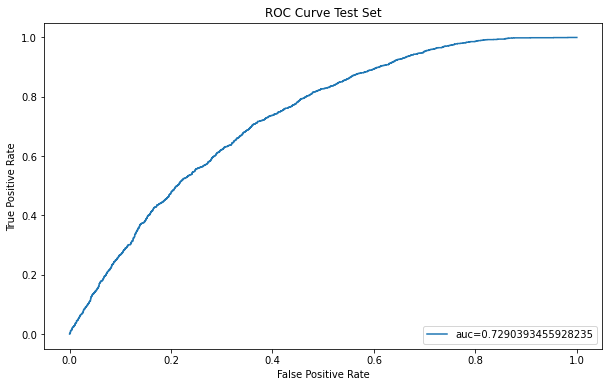

In [42]:
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.68      0.19      0.30      2351
           1       0.53      0.91      0.67      2351

    accuracy                           0.55      4702
   macro avg       0.60      0.55      0.48      4702
weighted avg       0.60      0.55      0.48      4702

[[ 448 1903]
 [ 213 2138]]


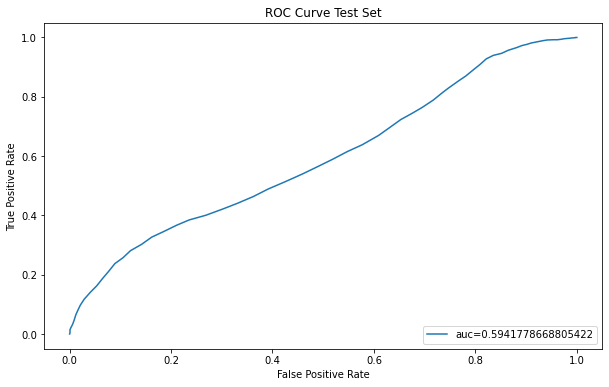

In [43]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

Conclusion- The LogisticRegression outperformed the RandomForest model on the scaled data. The is contradictory to my prediction. The LogisticRegression model had an AUC of 0.729, while RandomFroest AUC was 0.59. RandomForest performed worse on scale data than on the unscaled, with the AUC dropping between the two (0.66 to 0.59). LogisticRegression on scaled data is the best choice of models based upon what was run. Running more models to determine if LogisticRegression continues to be the best model for predictions would be best practice.  